In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
GojoBGR = cv2.imread('satoru.png')
FlowerBGR = cv2.imread('Flower.jpg')

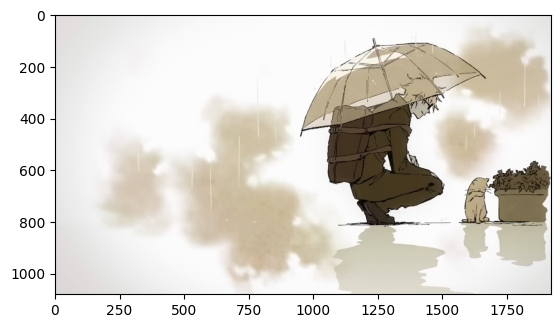

In [3]:
plt.imshow(GojoBGR)

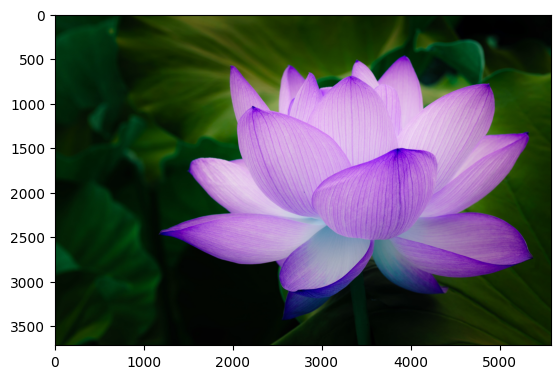

In [4]:
plt.imshow(FlowerBGR)

In [5]:
Gojo = cv2.cvtColor(GojoBGR,cv2.COLOR_BGR2RGB)
flower = cv2.cvtColor(FlowerBGR,cv2.COLOR_BGR2RGB)

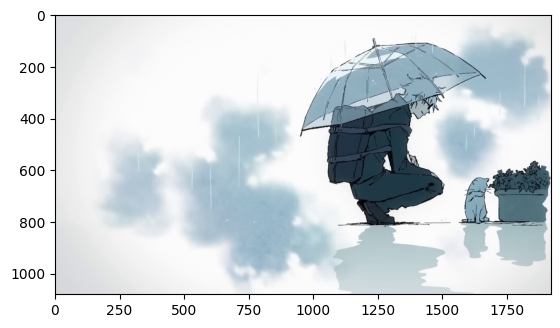

In [6]:
plt.imshow(Gojo)

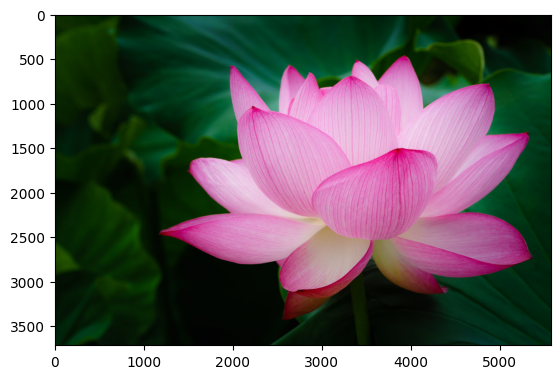

In [7]:
plt.imshow(flower)

**IMAGE TRANSLATION**

In [21]:
import numpy as np

def image_translator(image, cx, cy):
    height, width = image.shape[:2]
    resultant_img = np.full((height, width, 3), 255, dtype=np.uint8)  # Ensure the data type matches the input image

    if cx >= 0:
        src_x_start, src_x_end = 0, width - cx
        dst_x_start, dst_x_end = cx, width
    else:
        src_x_start, src_x_end = -cx, width
        dst_x_start, dst_x_end = 0, width + cx

    if cy >= 0:
        src_y_start, src_y_end = 0, height - cy
        dst_y_start, dst_y_end = cy, height
    else:
        src_y_start, src_y_end = -cy, height
        dst_y_start, dst_y_end = 0, height + cy

    resultant_img[dst_y_start:dst_y_end, dst_x_start:dst_x_end] = image[src_y_start:src_y_end, src_x_start:src_x_end]
    return resultant_img 



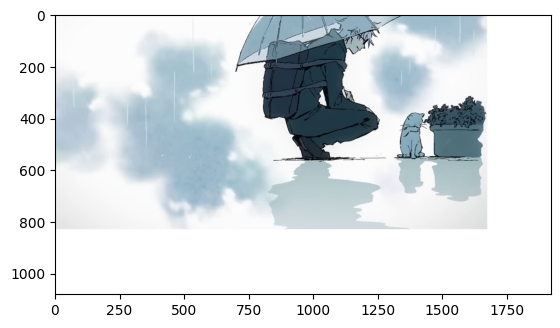

In [25]:
plt.imshow(image_translator(Gojo,-250,-250))

**IMAGE ROTATION**

In [10]:
def image_rotater(image,degree):
    rad = np.deg2rad(degree)
    sin,cos = np.sin(rad),np.cos(rad)
    height,width = image.shape[:2]
    resultant_img = np.full((height,width,3),255,np.uint8)
    center_x,center_y = width //2 , height //2
    for y in range(height):
        for x in range(width):
            pix_x , pix_y = x - center_x , y - center_y
            new_x , new_y = int(center_x+pix_x * cos + pix_y * (-sin)) , int(center_y + pix_x * (sin) + pix_y * cos)
            if 0 <= new_x < width and 0 <= new_y < height:
                resultant_img[new_y,new_x] = image[y,x]
    return resultant_img 
    
    

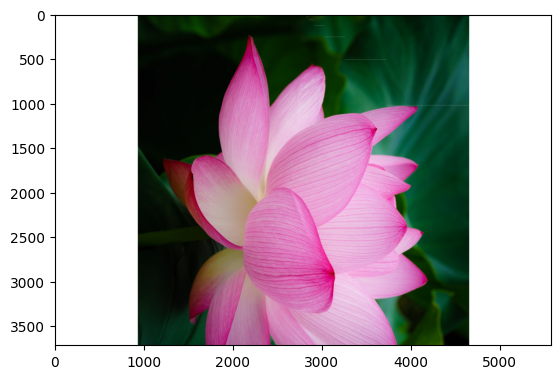

In [11]:
plt.imshow(image_rotater(flower,90))

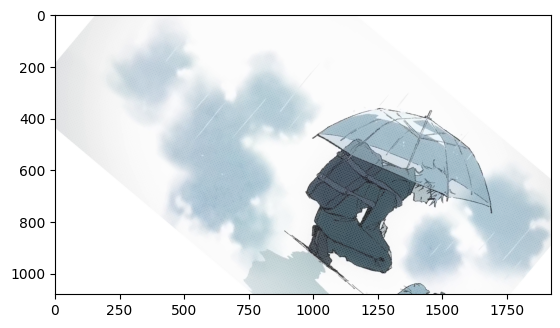

In [12]:
plt.imshow(image_rotater(Gojo,40))

**IMAGE SCALING**

In [13]:

def scaling(image, scale_x, scale_y):
    height, width, channels = image.shape
    new_height, new_width = int(height * scale_y), int(width * scale_x)
    scaled_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    for y in range(new_height):
        for x in range(new_width):
            orig_x = int(x / scale_x)
            orig_y = int(y / scale_y)
            if orig_x < width and orig_y < height:
                scaled_image[y, x] = image[orig_y, orig_x]
    
    return scaled_image 


Text(0.5, 1.0, 'Scaled')

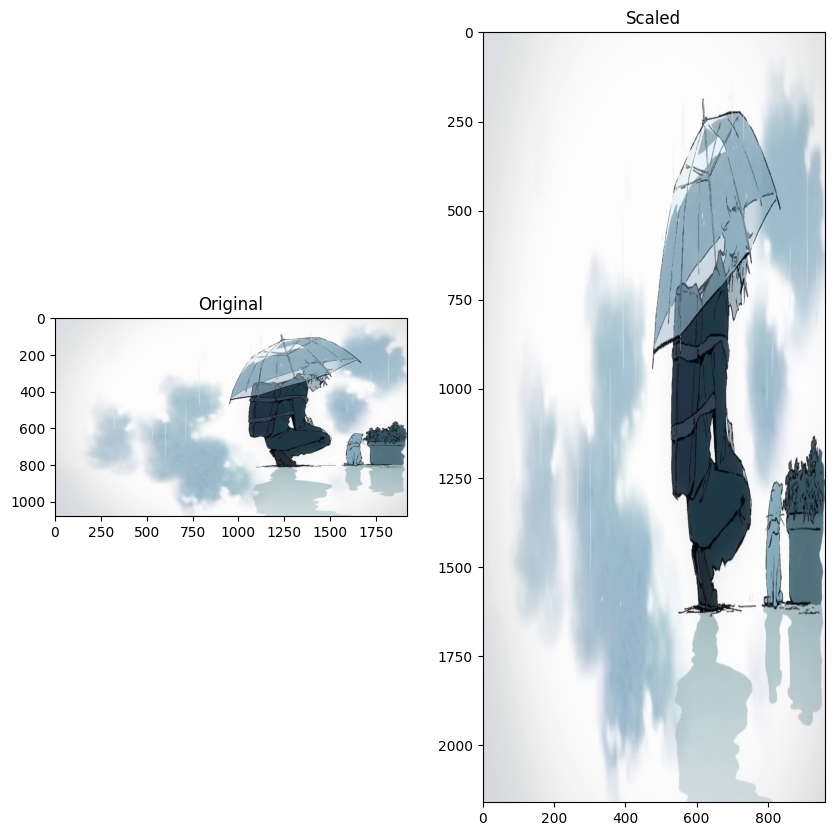

In [14]:
scaled_image = scaling(Gojo,.5,2)
fig,ax = plt.subplots(1,2,figsize =(10,10))
ax[0].imshow(Gojo)
ax[0].set_title('Original')
ax[1].imshow(scaled_image)
ax[1].set_title('Scaled')


**REFLECTION**

*Horizontal reflection*

In [15]:
def horizontal_reflection(image):
    height, width, channels = image.shape
    reflected_image = np.zeros((height, width, channels), dtype=np.uint8)
    for i in range(height):
        reflected_image[i, :] = image[height - i - 1, :]
    return reflected_image

Text(0.5, 1.0, 'flipped Gojo')

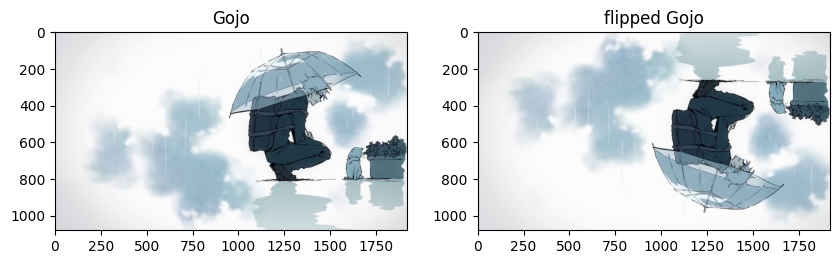

In [16]:
Gojo_hz = horizontal_reflection(Gojo)
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(Gojo)
ax[0].set_title('Gojo')
ax[1].imshow(Gojo_hz)
ax[1].set_title('flipped Gojo')

*Vertical reflection*

In [17]:
def vertical_reflection(image):
    height, width, channels = image.shape
    reflected_image = np.zeros((height, width, channels), dtype=np.uint8)
    for i in range(width):
        reflected_image[:,i] = image[:,width - i - 1]
    return reflected_image

Text(0.5, 1.0, 'flipped Gojo')

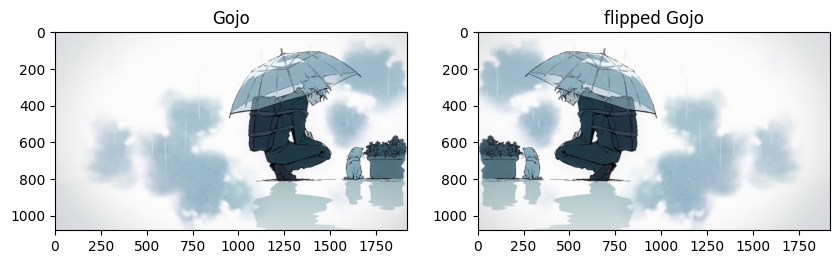

In [18]:

Gojo_ve = vertical_reflection(Gojo)
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(Gojo)
ax[0].set_title('Gojo')
ax[1].imshow(Gojo_ve)
ax[1].set_title('flipped Gojo')

*diagonal reflection*

In [19]:
def diagonal_reflection(image):
    height, width, channels = image.shape
    reflected_image = np.zeros((height, width, channels), dtype=np.uint8)
    for i in range(width):
        reflected_image[:,i] = image[:,width - i - 1]
    for j in range(height):
        reflected_image[j, :] = reflected_image[height - j - 1, :]
    return reflected_image

Text(0.5, 1.0, 'flipped Gojo')

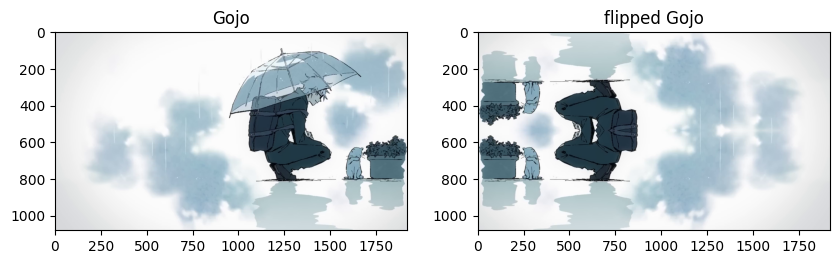

In [20]:
Gojo_dia = diagonal_reflection(Gojo)
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(Gojo)
ax[0].set_title('Gojo')
ax[1].imshow(Gojo_dia)
ax[1].set_title('flipped Gojo')

**Shear transformation**

In [29]:
import numpy as np
import cv2

def shear_image(image, shear_factor_x, shear_factor_y):
    height, width = image.shape[:2]
    new_width = int(width + abs(shear_factor_y * height))
    new_height = int(height + abs(shear_factor_x * width))

    sheared_image = np.full((new_height, new_width, 3), 255, dtype=np.uint8)
    
    for y in range(height):
        for x in range(width):
            new_x = int(x + shear_factor_y * y)
            new_y = int(y + shear_factor_x * x)
            
            if 0 <= new_x < new_width and 0 <= new_y < new_height:
                sheared_image[new_y, new_x] = image[y, x]

    return sheared_image


Text(0.5, 1.0, 'sheared')

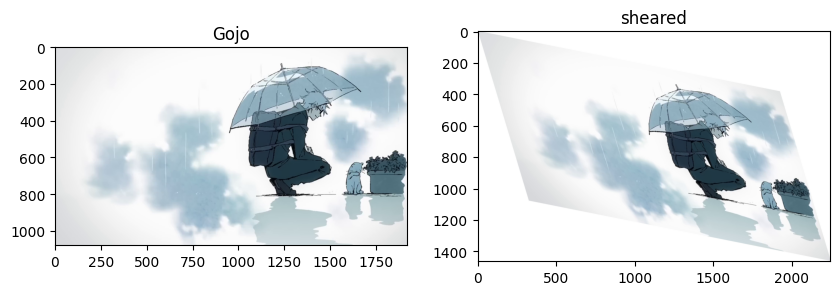

In [33]:
Gojo_shear = shear_image(Gojo,0.2,.3)
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(Gojo)
ax[0].set_title('Gojo')
ax[1].imshow(Gojo_shear)
ax[1].set_title('sheared')

Create the Transformation Matrix

Calculate New Image Dimensions

Initialize the Output Image

Generate Coordinate Grids

Perform Matrix Multiplication

Map Pixel Values

In [34]:
import cv2
import numpy as np

def combined_affine_transform(image, scale_x, scale_y, rotate_angle, translate_x, translate_y, shear_x, shear_y):
    height, width = image.shape[:2]
    
    # Create scaling matrix
    S = np.float32([[scale_x, 0, 0],
                    [0, scale_y, 0],
                    [0, 0, 1]])
    angle_rad = np.deg2rad(rotate_angle)
    R = np.float32([[np.cos(angle_rad), -np.sin(angle_rad), 0],
                    [np.sin(angle_rad), np.cos(angle_rad), 0],
                    [0, 0, 1]])
    
    T = np.float32([[1, 0, translate_x],
                    [0, 1, translate_y],
                    [0, 0, 1]])
    
    Sh = np.float32([[1, shear_x, 0],
                     [shear_y, 1, 0],
                     [0, 0, 1]])
    

    M = T @ R @ Sh @ S
    corners = np.array([[0, 0, 1], [width, 0, 1], [0, height, 1], [width, height, 1]])
    transformed_corners = np.dot(M, corners.T).T
    min_x = min(transformed_corners[:, 0])
    max_x = max(transformed_corners[:, 0])
    min_y = min(transformed_corners[:, 1])
    max_y = max(transformed_corners[:, 1])
    new_width = int(max_x - min_x)
    new_height = int(max_y - min_y)
    
    M[0, 2] -= min_x
    M[1, 2] -= min_y
    

    transformed_image = np.full((new_height, new_width, 3), 255, dtype=np.uint8)

    x_coords, y_coords = np.meshgrid(np.arange(new_width), np.arange(new_height))
    

    homogeneous_coords = np.vstack([x_coords.ravel(), y_coords.ravel(), np.ones_like(x_coords).ravel()])
    
    original_coords = np.linalg.inv(M) @ homogeneous_coords
    original_coords = original_coords[:2, :].astype(int)
    mask = (original_coords[0] >= 0) & (original_coords[0] < width) & (original_coords[1] >= 0) & (original_coords[1] < height)
    
    transformed_image[y_coords.ravel()[mask], x_coords.ravel()[mask]] = image[original_coords[1][mask], original_coords[0][mask]]
    
    return transformed_image



Text(0.5, 1.0, 'sheared')

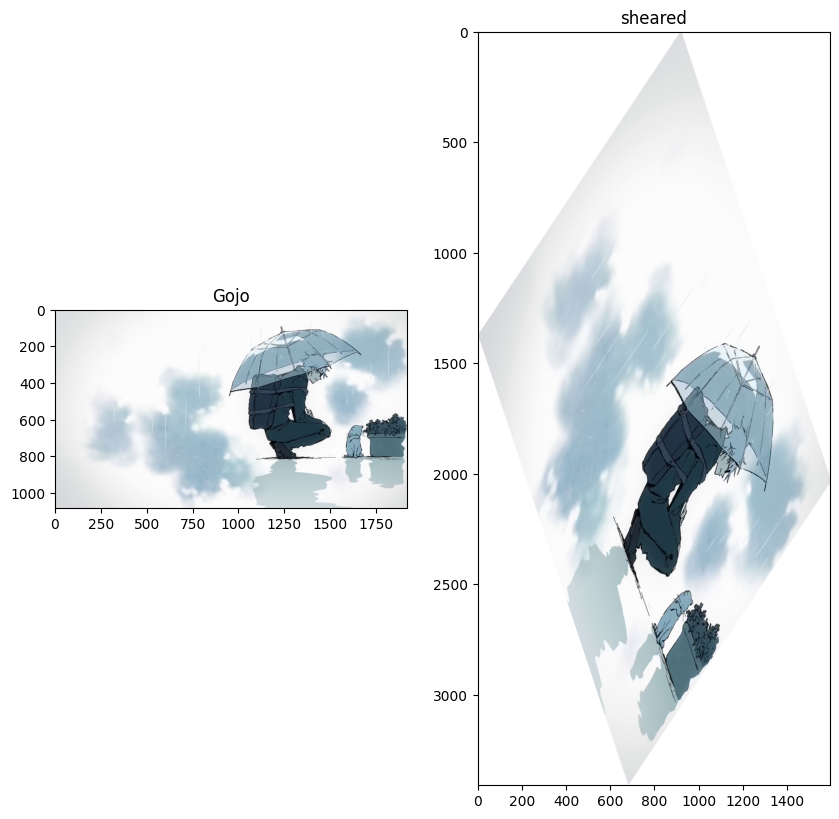

In [36]:
Gojo_affine = combined_affine_transform(Gojo,1,1.5,45,-100,-50,.2,.5)
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(Gojo)
ax[0].set_title('Gojo')
ax[1].imshow(Gojo_affine)
ax[1].set_title('sheared')